In [1]:
#Loading the dataset and importing relevant libraries
import pandas as pd
sales_df=pd.read_csv('advertising_and_sales_clean.csv')
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [2]:
#Drop the unwanted column
sales_df.drop('influencer',axis=1,inplace=True)	

In [3]:
#Split the dataset into features and targets
x=sales_df.drop("sales",axis=1).values
x

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [12]:
#Resahpe x
x=x.reshape(-1,1)
x

array([[ 6566.23],
       [ 9237.76],
       [15886.45],
       ...,
       [19800.07],
       [17534.64],
       [15966.69]])

In [4]:
#Targets
y=sales_df['sales'].values
y

array([ 54732.76,  46677.9 , 150177.83, ..., 163631.46, 253610.41,
       148202.41])

In [5]:
#Shape of x and y
print(x.shape,y.shape)

(4546, 3) (4546,)


In [6]:
#Spliting into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
#Creating a k_fold object
from sklearn.model_selection import KFold, cross_val_score
kf= KFold(n_splits=6,shuffle=True,random_state=42)


In [14]:
#Building the model
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()

#Perform the cross validation
cv_results= cross_val_score(lin_reg,x_train,y_train,cv=kf)

#Print the cross_val scores
print("The cross validation scores:",cv_results)

The cross validation scores: [0.99894422 0.9989379  0.99898196 0.99893677 0.9991564  0.99890589]


In [27]:
#Mean of the scores
print("The cross validation mean score:", np.mean(cv_results))
print("The stadard_deviation:",np.std(cv_results))
print("The 95% confidence interval:",np.quantile(cv_results,[0.025,0.975]))

The cross validation mean score: 0.9989771896362574
The stadard_deviation: 8.315254037408041e-05
The 95% confidence interval: [0.99890975 0.99913459]


In [18]:
#Fit the model
lin_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#Make predictions
y_pred=lin_reg.predict(x_test)

#Print the first five predictions
print("Predictions: {}, Actual_Values:{}".format(y_pred[:5],y_test[:5]))

Predictions: [ 53176.66154234  70996.19873235 267032.64132081 195731.02438566
 274005.60025851], Actual_Values:[ 55261.28  67574.9  272250.11 195102.18 273960.38]


In [20]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,r2_score

r2_score=lin_reg.score(x_test,y_test)
rmse=mean_squared_error(y_test,y_pred,squared=False)

#Printing the scores
print("R^2 Score : {}".format(r2_score))
print("RSME : {}".format(rmse))

R^2 Score : 0.9990152104759368
RSME : 2944.433199600101


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


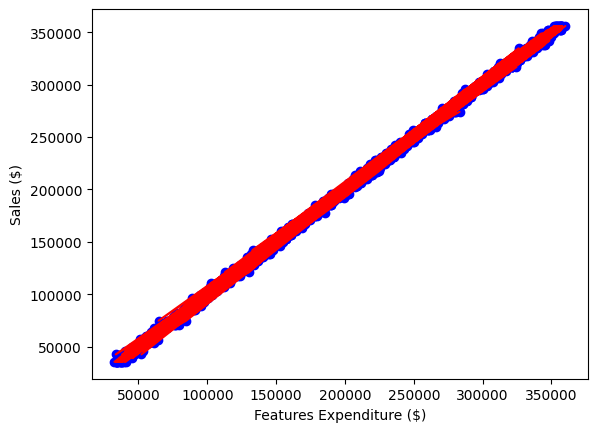

In [21]:
#Making visualization
import matplotlib.pyplot as plt

#Creating a scatter plot
plt.scatter(y_test,y_pred,color='b')

# Create line plot
plt.plot(y_test,y_pred, color="r")
plt.xlabel("Features Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()